In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Query for data on google BigQuery

SELECT date, new_confirmed, cumulative_confirmed, new_deceased, cumulative_deceased, new_persons_vaccinated, cumulative_persons_fully_vaccinated, new_hospitalized_patients, cumulative_hospitalized_patients,
new_recovered, cumulative_recovered, cumulative_tested, investment_in_vaccines, new_recovered, cumulative_recovered, current_hospitalized_patients
FROM `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE country_code = "US" AND new_confirmed IS NOT NULL AND new_deceased IS NOT NULL AND cumulative_persons_fully_vaccinated IS NOT NULL AND new_hospitalized_patients IS NOT NULL
AND cumulative_hospitalized_patients IS NOT NULL AND new_recovered IS NOT NULL AND cumulative_recovered IS NOT NULL AND cumulative_confirmed IS NOT NULL AND cumulative_deceased IS NOT NULL
AND cumulative_tested IS NOT NULL AND new_persons_vaccinated IS NOT NULL AND new_recovered IS NOT NULL AND cumulative_recovered IS NOT NULL AND current_hospitalized_patients IS NOT NULL
ORDER BY date DESC
LIMIT 16000

In [2]:
data = pd.read_csv('covid_data.csv')
data

,date,new_confirmed,cumulative_confirmed,new_deceased,cumulative_deceased,new_persons_vaccinated,cumulative_persons_fully_vaccinated,new_hospitalized_patients,cumulative_hospitalized_patients,new_recovered,cumulative_recovered,cumulative_tested,investment_in_vaccines,new_recovered_1,cumulative_recovered_1,current_hospitalized_patients
0,3/7/2021,180,186922,12,3808,8089,294681,10,13252,1554,156554,2783542,0.0,1554,156554,169
1,3/7/2021,895,490011,4,6550,37116,564791,2,25978,885,476055,7111428,NaN,885,476055,224
2,3/7/2021,260,297581,3,6808,17959,269236,0,9162,0,278162,1756955,NaN,0,278162,419
3,3/7/2021,709,387319,14,7955,26209,602926,79,35651,0,9703,8097590,NaN,0,9703,818
4,3/7/2021,211,113589,2,1900,5215,111664,13,6705,160,109531,701924,NaN,160,109531,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,1/13/2021,4625,665499,137,8148,7158,24026,145,15655,9629,588974,5915239,0.0,9629,588974,3193
1073,1/13/2021,167,95135,1,1364,669,6395,16,3683,179,92029,1287521,NaN,179,92029,72
1074,1/13/2021,1000,177670,19,1791,3189,10529,22,5497,-1864,120700,1874707,NaN,-1864,120700,457
1075,1/13/2021,1034,151273,12,1556,1672,5653,49,6128,837,67633,566225,NaN,837,67633,283


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 1077 non-null   object 
 1   new_confirmed                        1077 non-null   int64  
 2   cumulative_confirmed                 1077 non-null   int64  
 3   new_deceased                         1077 non-null   int64  
 4   cumulative_deceased                  1077 non-null   int64  
 5   new_persons_vaccinated               1077 non-null   int64  
 6   cumulative_persons_fully_vaccinated  1077 non-null   int64  
 7   new_hospitalized_patients            1077 non-null   int64  
 8   cumulative_hospitalized_patients     1077 non-null   int64  
 9   new_recovered                        1077 non-null   int64  
 10  cumulative_recovered                 1077 non-null   int64  
 11  cumulative_tested             

In [4]:
print(data.isnull().any())

date                                   False
new_confirmed                          False
cumulative_confirmed                   False
new_deceased                           False
cumulative_deceased                    False
new_persons_vaccinated                 False
cumulative_persons_fully_vaccinated    False
new_hospitalized_patients              False
cumulative_hospitalized_patients       False
new_recovered                          False
cumulative_recovered                   False
cumulative_tested                      False
investment_in_vaccines                  True
new_recovered_1                        False
cumulative_recovered_1                 False
current_hospitalized_patients          False
dtype: bool


# Fill investment_in_vaccines missing values with mean of investment_in_vaccines

In [5]:
mean_investment_in_vac = np.mean(data['investment_in_vaccines'])
mean_investment_in_vac

2604.1666666666665

In [6]:
data["investment_in_vaccines"].fillna(mean_investment_in_vac, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 1077 non-null   object 
 1   new_confirmed                        1077 non-null   int64  
 2   cumulative_confirmed                 1077 non-null   int64  
 3   new_deceased                         1077 non-null   int64  
 4   cumulative_deceased                  1077 non-null   int64  
 5   new_persons_vaccinated               1077 non-null   int64  
 6   cumulative_persons_fully_vaccinated  1077 non-null   int64  
 7   new_hospitalized_patients            1077 non-null   int64  
 8   cumulative_hospitalized_patients     1077 non-null   int64  
 9   new_recovered                        1077 non-null   int64  
 10  cumulative_recovered                 1077 non-null   int64  
 11  cumulative_tested             

# Change date to datetime and change investment_in_vaccines to int

In [8]:
data['date'] = pd.to_datetime(data['date'])
data.investment_in_vaccines = data.investment_in_vaccines.astype(int)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 1077 non-null   datetime64[ns]
 1   new_confirmed                        1077 non-null   int64         
 2   cumulative_confirmed                 1077 non-null   int64         
 3   new_deceased                         1077 non-null   int64         
 4   cumulative_deceased                  1077 non-null   int64         
 5   new_persons_vaccinated               1077 non-null   int64         
 6   cumulative_persons_fully_vaccinated  1077 non-null   int64         
 7   new_hospitalized_patients            1077 non-null   int64         
 8   cumulative_hospitalized_patients     1077 non-null   int64         
 9   new_recovered                        1077 non-null   int64         
 10  cumulative_r

# Create correlation matrices

In [10]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(10, 'current_hospitalized_patients').index
columns

Index(['current_hospitalized_patients', 'new_confirmed',
       'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_hospitalized_patients', 'new_hospitalized_patients',
       'cumulative_tested', 'cumulative_recovered', 'cumulative_recovered_1',
       'new_persons_vaccinated'],
      dtype='object')

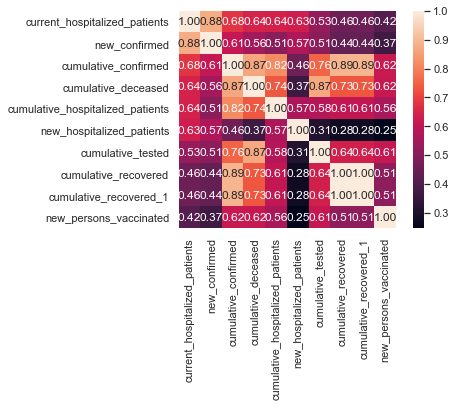

In [11]:
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [12]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(10, 'new_confirmed').index
columns

Index(['new_confirmed', 'current_hospitalized_patients',
       'cumulative_confirmed', 'new_hospitalized_patients',
       'cumulative_deceased', 'cumulative_tested',
       'cumulative_hospitalized_patients', 'cumulative_recovered',
       'cumulative_recovered_1', 'new_recovered'],
      dtype='object')

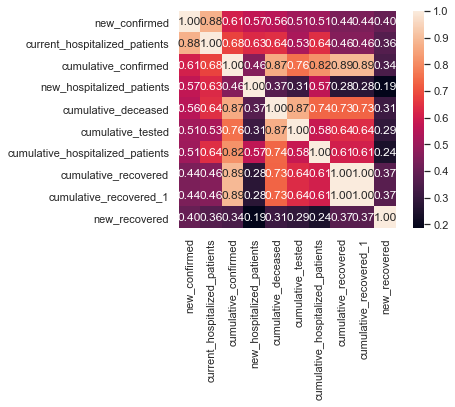

In [13]:
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

# Pull different data and see if I can find more useful info

SELECT date, subregion1_name, population, life_expectancy, new_confirmed, cumulative_confirmed,
       new_hospitalized_patients, cumulative_deceased, cumulative_tested, cumulative_hospitalized_patients
FROM bigquery-public-data.covid19_open_data.covid19_open_data
WHERE country_code = "US"
AND date IS NOT NULL AND subregion1_name IS NOT NULL AND subregion2_name IS NOT NULL AND population IS NOT NULL AND life_expectancy IS NOT NULL 
AND new_confirmed IS NOT NULL AND cumulative_confirmed IS NOT NULL AND new_hospitalized_patients IS NOT NULL AND cumulative_deceased IS NOT NULL AND cumulative_tested IS NOT NULL
AND cumulative_hospitalized_patients IS NOT NULL
ORDER BY date DESC
LIMIT 16000

In [14]:
data2 = pd.read_csv('covid_data_2.csv')
data2

,date,subregion1_name,population,life_expectancy,new_confirmed,cumulative_confirmed,new_hospitalized_patients,cumulative_deceased,cumulative_tested,cumulative_hospitalized_patients
0,3/29/2021,Florida,1426736,77.533083,256,121158,3,1602,1343177,2987
1,3/29/2021,Florida,1934516,79.300597,733,213894,7,2629,2785101,9611
2,3/29/2021,Florida,14428,77.666667,1,1656,0,42,19237,59
3,3/29/2021,Florida,290965,77.575439,28,30281,0,309,335121,687
4,3/29/2021,Florida,212228,77.186207,28,17344,1,325,207627,905
...,...,...,...,...,...,...,...,...,...,...
15995,8/10/2020,Florida,1934516,79.300597,710,63268,59,821,681554,5140
15996,8/10/2020,Florida,587769,77.314815,93,6211,16,151,113848,514
15997,8/10/2020,Florida,313163,77.727907,87,5858,13,166,72776,586
15998,8/10/2020,Florida,103852,77.426087,27,1472,4,37,26285,172


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              16000 non-null  object 
 1   subregion1_name                   16000 non-null  object 
 2   population                        16000 non-null  int64  
 3   life_expectancy                   16000 non-null  float64
 4   new_confirmed                     16000 non-null  int64  
 5   cumulative_confirmed              16000 non-null  int64  
 6   new_hospitalized_patients         16000 non-null  int64  
 7   cumulative_deceased               16000 non-null  int64  
 8   cumulative_tested                 16000 non-null  int64  
 9   cumulative_hospitalized_patients  16000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.2+ MB


In [16]:
data2['date'] = pd.to_datetime(data2['date'])

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              16000 non-null  datetime64[ns]
 1   subregion1_name                   16000 non-null  object        
 2   population                        16000 non-null  int64         
 3   life_expectancy                   16000 non-null  float64       
 4   new_confirmed                     16000 non-null  int64         
 5   cumulative_confirmed              16000 non-null  int64         
 6   new_hospitalized_patients         16000 non-null  int64         
 7   cumulative_deceased               16000 non-null  int64         
 8   cumulative_tested                 16000 non-null  int64         
 9   cumulative_hospitalized_patients  16000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), ob

In [18]:
data2

,date,subregion1_name,population,life_expectancy,new_confirmed,cumulative_confirmed,new_hospitalized_patients,cumulative_deceased,cumulative_tested,cumulative_hospitalized_patients
0,2021-03-29,Florida,1426736,77.533083,256,121158,3,1602,1343177,2987
1,2021-03-29,Florida,1934516,79.300597,733,213894,7,2629,2785101,9611
2,2021-03-29,Florida,14428,77.666667,1,1656,0,42,19237,59
3,2021-03-29,Florida,290965,77.575439,28,30281,0,309,335121,687
4,2021-03-29,Florida,212228,77.186207,28,17344,1,325,207627,905
...,...,...,...,...,...,...,...,...,...,...
15995,2020-08-10,Florida,1934516,79.300597,710,63268,59,821,681554,5140
15996,2020-08-10,Florida,587769,77.314815,93,6211,16,151,113848,514
15997,2020-08-10,Florida,313163,77.727907,87,5858,13,166,72776,586
15998,2020-08-10,Florida,103852,77.426087,27,1472,4,37,26285,172


In [19]:
# Rename columns to state and county
data2 = data2.rename(columns={"subregion1_name": "state"})
data2

,date,state,population,life_expectancy,new_confirmed,cumulative_confirmed,new_hospitalized_patients,cumulative_deceased,cumulative_tested,cumulative_hospitalized_patients
0,2021-03-29,Florida,1426736,77.533083,256,121158,3,1602,1343177,2987
1,2021-03-29,Florida,1934516,79.300597,733,213894,7,2629,2785101,9611
2,2021-03-29,Florida,14428,77.666667,1,1656,0,42,19237,59
3,2021-03-29,Florida,290965,77.575439,28,30281,0,309,335121,687
4,2021-03-29,Florida,212228,77.186207,28,17344,1,325,207627,905
...,...,...,...,...,...,...,...,...,...,...
15995,2020-08-10,Florida,1934516,79.300597,710,63268,59,821,681554,5140
15996,2020-08-10,Florida,587769,77.314815,93,6211,16,151,113848,514
15997,2020-08-10,Florida,313163,77.727907,87,5858,13,166,72776,586
15998,2020-08-10,Florida,103852,77.426087,27,1472,4,37,26285,172


In [20]:
correlation = data2.corr(method='pearson')
columns = correlation.nlargest(10, 'new_confirmed').index
columns

Index(['new_confirmed', 'cumulative_confirmed', 'cumulative_tested',
       'population', 'new_hospitalized_patients', 'cumulative_deceased',
       'cumulative_hospitalized_patients', 'life_expectancy'],
      dtype='object')

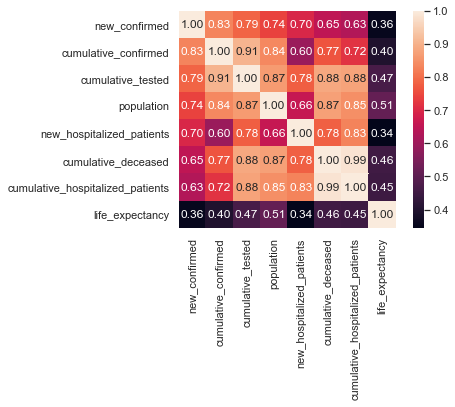

In [21]:
correlation_map = np.corrcoef(data2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [22]:
correlation = data2.corr(method='pearson')
columns = correlation.nlargest(10, 'new_hospitalized_patients').index
columns

Index(['new_hospitalized_patients', 'cumulative_hospitalized_patients',
       'cumulative_deceased', 'cumulative_tested', 'new_confirmed',
       'population', 'cumulative_confirmed', 'life_expectancy'],
      dtype='object')

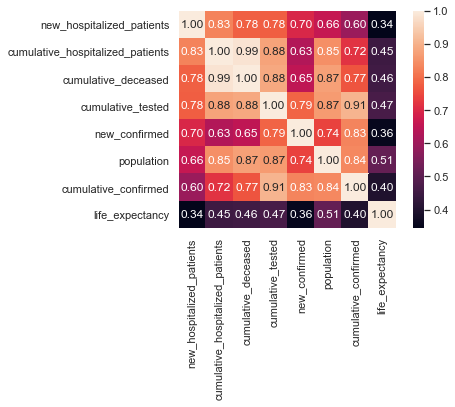

In [23]:
correlation_map = np.corrcoef(data2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

Looks like we can remove life expectancy from data for models.

# Try model and remove state and date and life expectancy

In [24]:
data2_no_state = data2[["date","population","new_confirmed","cumulative_confirmed",
                        "new_hospitalized_patients","cumulative_deceased","cumulative_tested",
                        "cumulative_hospitalized_patients"]]
data2_no_state

,date,population,new_confirmed,cumulative_confirmed,new_hospitalized_patients,cumulative_deceased,cumulative_tested,cumulative_hospitalized_patients
0,2021-03-29,1426736,256,121158,3,1602,1343177,2987
1,2021-03-29,1934516,733,213894,7,2629,2785101,9611
2,2021-03-29,14428,1,1656,0,42,19237,59
3,2021-03-29,290965,28,30281,0,309,335121,687
4,2021-03-29,212228,28,17344,1,325,207627,905
...,...,...,...,...,...,...,...,...
15995,2020-08-10,1934516,710,63268,59,821,681554,5140
15996,2020-08-10,587769,93,6211,16,151,113848,514
15997,2020-08-10,313163,87,5858,13,166,72776,586
15998,2020-08-10,103852,27,1472,4,37,26285,172


In [25]:
data2_no_state_no_date = data2_no_state[["population","new_confirmed",
                        "new_hospitalized_patients","cumulative_deceased","cumulative_tested",
                        "cumulative_hospitalized_patients"]]
data2_no_state_no_date

,population,new_confirmed,new_hospitalized_patients,cumulative_deceased,cumulative_tested,cumulative_hospitalized_patients
0,1426736,256,3,1602,1343177,2987
1,1934516,733,7,2629,2785101,9611
2,14428,1,0,42,19237,59
3,290965,28,0,309,335121,687
4,212228,28,1,325,207627,905
...,...,...,...,...,...,...
15995,1934516,710,59,821,681554,5140
15996,587769,93,16,151,113848,514
15997,313163,87,13,166,72776,586
15998,103852,27,4,37,26285,172


# Predict new_confirmed cases

In [26]:
# Normalize certain columns
data2_no_state_no_date['population'] = np.log(data2_no_state_no_date['population'])
data2_no_state_no_date['cumulative_hospitalized_patients'] = np.log(data2_no_state_no_date['cumulative_hospitalized_patients'])
data2_no_state_no_date['cumulative_tested'] = np.log(data2_no_state_no_date['cumulative_tested'])
data2_no_state_no_date['cumulative_deceased'] = np.log(data2_no_state_no_date['cumulative_deceased'])

data2_no_state_no_date.describe()


C:\Users\Sebeast\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sebeast\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sebeast\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,population,new_confirmed,new_hospitalized_patients,cumulative_deceased,cumulative_tested,cumulative_hospitalized_patients
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,11.882921,124.301687,5.677500,4.895883,11.361231,6.135576
std,1.582463,265.904560,13.606467,1.767306,1.684068,1.664127
min,9.016270,1.000000,0.000000,0.693147,7.153052,1.609438
25%,10.525166,9.000000,0.000000,3.583519,9.982437,4.934474
50%,12.067092,32.000000,2.000000,4.867534,11.228611,6.068426
75%,13.045052,113.000000,5.000000,6.068426,12.554967,7.171081
max,14.813674,4072.000000,146.000000,8.983565,15.464391,10.252700


In [27]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [28]:
X = data2_no_state_no_date.drop("new_confirmed",axis=1).values
y = data2_no_state_no_date["new_confirmed"].values

In [29]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [30]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 
# This one usually best
pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
#pipelines.append(
#                ("Scaled_ADA-Reg",
#                 Pipeline([
#                     ("Scaler", StandardScaler()),
#                     ("ADA-reg", AdaBoostRegressor())
#                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    


C:\Users\Sebeast\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Scaled_Ridge: 0.582776 (+/- 0.039034)
Scaled_Lasso: 0.540214 (+/- 0.039068)
Scaled_Elastic: 0.523051 (+/- 0.042540)
Scaled_SVR: 0.510625 (+/- 0.039044)
Scaled_RF_reg: 0.911357 (+/- 0.027474)
Scaled_ET_reg: 0.908928 (+/- 0.025119)
Scaled_BR_reg: 0.908669 (+/- 0.026706)
Scaled_Hub-Reg: 0.519644 (+/- 0.039697)
Scaled_BayRidge: 0.582777 (+/- 0.039040)
Scaled_XGB_reg: 0.907123 (+/- 0.021247)
Scaled_DT_reg: 0.856990 (+/- 0.030956)
Scaled_KNN_reg: 0.895128 (+/- 0.027369)
Scaled_Gboost-Reg: 0.892811 (+/- 0.026327)
Scaled_RFR_PCA: 0.878802 (+/- 0.029752)
Scaled_XGBR_PCA: 0.863744 (+/- 0.024565)


Much different results. The best model here is scaled random forest reg with a mean r2 score of 0.911357  and a standard deviation of +/- 0.027474.

# Testing model: Scaled random forest reg

In [31]:
rfr = RandomForestRegressor(random_state=seed)
rfr.fit(X_train, y_train)
y_hat = rfr.predict(X_test)

In [32]:
rfr.score(X_test,y_test)

0.9269484469607636

In [33]:
compare = pd.DataFrame({'Prediction': y_hat, 'Test Data' : y_test})
compare["Difference"] = abs(compare.Prediction-compare["Test Data"])
compare["MSE"] = np.mean(compare["Difference"])
compare

,Prediction,Test Data,Difference,MSE
0,1347.27,1432,84.73,29.108283
1,197.02,166,31.02,29.108283
2,13.80,3,10.80,29.108283
3,171.65,236,64.35,29.108283
4,2.57,4,1.43,29.108283
...,...,...,...,...
3195,25.86,15,10.86,29.108283
3196,9.75,6,3.75,29.108283
3197,3.52,2,1.52,29.108283
3198,13.32,34,20.68,29.108283


# Predict new_hospitalized_patients

In [34]:
X = data2_no_state_no_date.drop("new_hospitalized_patients",axis=1).values
y = data2_no_state_no_date["new_hospitalized_patients"].values

In [35]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [36]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
#pipelines.append(
#                ("Scaled_ADA-Reg",
#                 Pipeline([
#                     ("Scaler", StandardScaler()),
#                     ("ADA-reg", AdaBoostRegressor())
#                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

C:\Users\Sebeast\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Scaled_Ridge: 0.570543 (+/- 0.026111)
Scaled_Lasso: 0.492964 (+/- 0.017593)
Scaled_Elastic: 0.482939 (+/- 0.009915)
Scaled_SVR: 0.449803 (+/- 0.013991)
Scaled_RF_reg: 0.948843 (+/- 0.005976)
Scaled_ET_reg: 0.948407 (+/- 0.007278)
Scaled_BR_reg: 0.945803 (+/- 0.005750)
Scaled_Hub-Reg: 0.460094 (+/- 0.013307)
Scaled_BayRidge: 0.570542 (+/- 0.026111)
Scaled_XGB_reg: 0.948842 (+/- 0.005939)
Scaled_DT_reg: 0.909799 (+/- 0.010218)
Scaled_KNN_reg: 0.923665 (+/- 0.010986)
Scaled_Gboost-Reg: 0.938212 (+/- 0.006797)
Scaled_RFR_PCA: 0.924523 (+/- 0.010829)
Scaled_XGBR_PCA: 0.921794 (+/- 0.011655)


Best result is scaled random forest reg again. The mean r2 score was 0.948843 and the standard deviation was +/- 0.005976. This model is probably overfitting the data though.

In [37]:
rfr = RandomForestRegressor(random_state=seed)
rfr.fit(X_train, y_train)
y_hat = rfr.predict(X_test)

In [38]:
rfr.score(X_test,y_test)

0.9460211682444021

In [39]:
compare = pd.DataFrame({'Prediction': y_hat, 'Test Data' : y_test})
compare["Difference"] = abs(compare.Prediction-compare["Test Data"])
compare["Avg Difference"] = np.mean(compare["Difference"])
compare

,Prediction,Test Data,Difference,Avg Difference
0,116.59,119,2.41,1.717697
1,8.98,10,1.02,1.717697
2,0.16,0,0.16,1.717697
3,9.63,8,1.63,1.717697
4,0.36,0,0.36,1.717697
...,...,...,...,...
3195,1.05,0,1.05,1.717697
3196,0.82,0,0.82,1.717697
3197,0.24,1,0.76,1.717697
3198,1.29,1,0.29,1.717697


# Finalized features that the model will be built on; target feature is new_hospitalized_patients.

SELECT date, subregion1_name, subregion2_name, population, life_expectancy, new_confirmed, cumulative_confirmed,
       new_hospitalized_patients, cumulative_deceased, cumulative_tested, cumulative_hospitalized_patients, latitude, longitude, area_sq_km, population_male, population_female, population_age_00_09,
       population_age_10_19, population_age_20_29, population_age_30_39, population_age_40_49, population_age_50_59, population_age_60_69, population_age_70_79, population_age_80_and_older
FROM bigquery-public-data.covid19_open_data.covid19_open_data
WHERE country_code = "US"
AND date IS NOT NULL AND subregion1_name IS NOT NULL AND subregion2_name IS NOT NULL AND population IS NOT NULL AND life_expectancy IS NOT NULL 
AND new_confirmed IS NOT NULL AND cumulative_confirmed IS NOT NULL AND new_hospitalized_patients IS NOT NULL AND cumulative_deceased IS NOT NULL AND cumulative_tested IS NOT NULL
AND cumulative_hospitalized_patients IS NOT NULL AND latitude IS NOT NULL AND longitude IS NOT NULL AND area_sq_km IS NOT NULL AND population_male IS NOT NULL AND population_female IS NOT NULL
AND population_age_00_09 IS NOT NULL AND population_age_10_19 IS NOT NULL AND population_age_20_29 IS NOT NULL AND population_age_30_39 IS NOT NULL AND population_age_40_49 IS NOT NULL
AND population_age_50_59 IS NOT NULL AND population_age_60_69 IS NOT NULL AND population_age_70_79 IS NOT NULL AND population_age_80_and_older IS NOT NULL AND subregion2_name IS NOT NULL
ORDER BY date DESC
LIMIT 16000

In [47]:
data3 = pd.read_csv('covid_data_3.csv')
# Renaem columns to state and county
data3 = data3.rename(columns={"subregion1_name": "state", "subregion2_name":"county"})
data3

,date,state,county,population,life_expectancy,new_confirmed,cumulative_confirmed,new_hospitalized_patients,cumulative_deceased,cumulative_tested,...,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,3/30/2021,Florida,Hillsborough County,1426736,77.533083,395,121546,4,1611,1346632,...,729165,178297,178833,206500,205720,191896,187064,147586,84880,45960
1,3/30/2021,Florida,St. Johns County,243693,80.342424,40,21167,0,202,249578,...,124961,26849,31992,22942,28237,33191,35526,33418,21201,10337
2,3/30/2021,Florida,Sumter County,124995,76.058333,11,8789,0,258,101387,...,62576,4912,4818,6454,7631,7475,10952,31782,37721,13250
3,3/30/2021,Florida,Levy County,40276,74.925000,10,3093,0,43,34025,...,20565,4269,4293,4375,4082,4299,5958,6335,4555,2110
4,3/30/2021,Florida,Broward County,1934516,79.300597,701,214588,6,2634,2794367,...,992102,225540,227767,245152,261834,261712,280940,215325,132157,84089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,8/11/2020,Florida,Glades County,13580,74.550000,1,424,0,3,1278,...,6008,1016,1331,1585,1686,1677,1756,1808,1829,892
15996,8/11/2020,Florida,Gilchrist County,17900,77.360000,10,385,1,6,5589,...,8646,1997,2297,2407,1877,1936,2524,2393,1583,886
15997,8/11/2020,Florida,Orange County,1355921,78.435979,288,30645,12,315,380654,...,691030,167657,174424,227434,207011,183459,170537,123196,66269,35934
15998,8/11/2020,New York,Queens County,2295808,81.483710,51,68602,2,5900,813522,...,1182284,271278,236589,326769,346113,307424,316154,254786,143156,93539


In [121]:
data3['state'].value_counts()

Florida     14847
New York     1153
Name: state, dtype: int64

This is a limitation of the model. It is using data only from Florida and New York

In [48]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              16000 non-null  object 
 1   state                             16000 non-null  object 
 2   county                            16000 non-null  object 
 3   population                        16000 non-null  int64  
 4   life_expectancy                   16000 non-null  float64
 5   new_confirmed                     16000 non-null  int64  
 6   cumulative_confirmed              16000 non-null  int64  
 7   new_hospitalized_patients         16000 non-null  int64  
 8   cumulative_deceased               16000 non-null  int64  
 9   cumulative_tested                 16000 non-null  int64  
 10  cumulative_hospitalized_patients  16000 non-null  int64  
 11  latitude                          16000 non-null  float64
 12  long

In [49]:
data3.columns

Index(['date', 'state', 'county', 'population', 'life_expectancy',
       'new_confirmed', 'cumulative_confirmed', 'new_hospitalized_patients',
       'cumulative_deceased', 'cumulative_tested',
       'cumulative_hospitalized_patients', 'latitude', 'longitude',
       'area_sq_km', 'population_male', 'population_female',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [50]:
data3_cat = data3[["state","county"]]
data3_num = data3[['population', 'life_expectancy',
       'new_confirmed', 'cumulative_confirmed', 'new_hospitalized_patients',
       'cumulative_deceased', 'cumulative_tested',
       'cumulative_hospitalized_patients', 'latitude', 'longitude',
       'area_sq_km', 'population_male', 'population_female',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older']]

In [54]:
correlation = data3_num.corr(method='pearson')
columns = correlation.nlargest(22, 'new_confirmed').index
columns

Index(['new_confirmed', 'cumulative_confirmed', 'cumulative_tested',
       'population_age_40_49', 'population_age_50_59', 'population_age_10_19',
       'population_male', 'population', 'population_female',
       'population_age_00_09', 'population_age_60_69', 'population_age_30_39',
       'population_age_20_29', 'population_age_70_79',
       'new_hospitalized_patients', 'population_age_80_and_older',
       'cumulative_deceased', 'cumulative_hospitalized_patients', 'longitude',
       'life_expectancy', 'area_sq_km', 'latitude'],
      dtype='object')

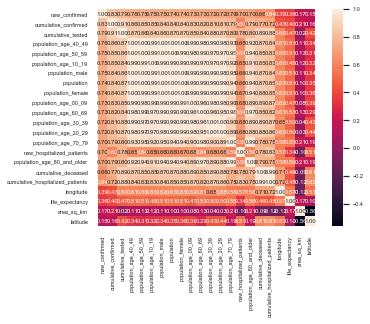

In [56]:
correlation_map = np.corrcoef(data3[columns].values.T)
sns.set(font_scale=.5)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

Looks like longitude, life_expectancy, area_sq_km, and latitude are not correlative.

['new_confirmed', 'cumulative_confirmed', 'cumulative_tested',
       'population_age_40_49', 'population_age_50_59', 'population_age_10_19',
       'population_male', 'population', 'population_female',
       'population_age_00_09', 'population_age_60_69', 'population_age_30_39',
       'population_age_20_29', 'population_age_70_79',
       'new_hospitalized_patients', 'population_age_80_and_older',
       'cumulative_deceased', 'cumulative_hospitalized_patients']

In [ ]:
correlation = data3_num.corr(method='pearson')
columns = correlation.nlargest(22, 'new_hospitalized_patients').index
columns

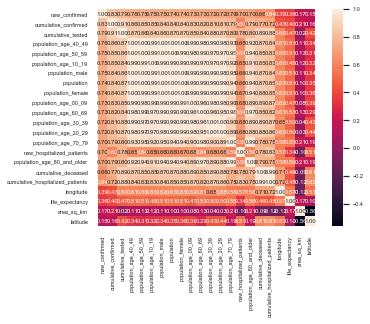

In [57]:
correlation_map = np.corrcoef(data3[columns].values.T)
sns.set(font_scale=.5)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

Looks like longitude, life_expectancy, area_sq_km, and latitude are not correlative

['new_confirmed', 'cumulative_confirmed', 'cumulative_tested',
       'population_age_40_49', 'population_age_50_59', 'population_age_10_19',
       'population_male', 'population', 'population_female',
       'population_age_00_09', 'population_age_60_69', 'population_age_30_39',
       'population_age_20_29', 'population_age_70_79',
       'new_hospitalized_patients', 'population_age_80_and_older',
       'cumulative_deceased', 'cumulative_hospitalized_patients']

In [113]:
data3_pop = data3[['new_confirmed', 'cumulative_tested',
                   'population_age_40_49', 'population_age_50_59', 'population_age_10_19',
                   'population_male', 'population', 'population_female', 'population_age_00_09',
                   'population_age_60_69', 'population_age_30_39', 'population_age_20_29', 'population_age_70_79',
                   'new_hospitalized_patients', 'population_age_80_and_older', 'cumulative_deceased',
                  ]]
data3_pop

,new_confirmed,cumulative_tested,population_age_40_49,population_age_50_59,population_age_10_19,population_male,population,population_female,population_age_00_09,population_age_60_69,population_age_30_39,population_age_20_29,population_age_70_79,new_hospitalized_patients,population_age_80_and_older,cumulative_deceased
0,395,1346632,191896,187064,178833,697571,1426736,729165,178297,147586,205720,206500,84880,4,45960,1611
1,40,249578,33191,35526,31992,118732,243693,124961,26849,33418,28237,22942,21201,0,10337,202
2,11,101387,7475,10952,4818,62419,124995,62576,4912,31782,7631,6454,37721,0,13250,258
3,10,34025,4299,5958,4293,19711,40276,20565,4269,6335,4082,4375,4555,0,2110,43
4,701,2794367,261712,280940,227767,942414,1934516,992102,225540,215325,261834,245152,132157,6,84089,2634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1,1278,1677,1756,1331,7572,13580,6008,1016,1808,1686,1585,1829,0,892,3
15996,10,5589,1936,2524,2297,9254,17900,8646,1997,2393,1877,2407,1583,1,886,6
15997,288,380654,183459,170537,174424,664891,1355921,691030,167657,123196,207011,227434,66269,12,35934,315
15998,51,813522,307424,316154,236589,1113524,2295808,1182284,271278,254786,346113,326769,143156,2,93539,5900


In [114]:
data3_pop.describe()

,new_confirmed,cumulative_tested,population_age_40_49,population_age_50_59,population_age_10_19,population_male,population,population_female,population_age_00_09,population_age_60_69,population_age_30_39,population_age_20_29,population_age_70_79,new_hospitalized_patients,population_age_80_and_older,cumulative_deceased
count,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,124.204437,3.400714e+05,52708.979063,56548.686375,47440.533563,2.058403e+05,4.240263e+05,2.181861e+05,47941.883938,49833.113937,56768.580313,58143.165313,34137.018125,5.686875,20504.381812,595.248375
std,264.111279,6.994558e+05,83115.846992,83211.051663,70584.070728,3.018714e+05,6.270171e+05,3.252155e+05,76182.608945,66170.194350,94099.275687,92951.545347,42455.541674,13.644815,27912.705452,1290.079402
min,1.000000,1.278000e+03,1266.000000,1013.000000,891.000000,4.931000e+03,8.236000e+03,3.191000e+03,771.000000,866.000000,1160.000000,1256.000000,544.000000,0.000000,241.000000,2.000000
25%,9.000000,2.179100e+04,4299.000000,4667.000000,4123.000000,1.971100e+04,3.724100e+04,1.608100e+04,3956.000000,3822.000000,4521.000000,4375.000000,2519.000000,0.000000,1340.000000,36.000000
50%,32.000000,7.587250e+04,16864.000000,25445.000000,15532.000000,8.845300e+04,1.740490e+05,8.525600e+04,13598.000000,25263.000000,14463.000000,14676.000000,15916.000000,2.000000,8377.000000,131.000000
75%,114.000000,2.848245e+05,59474.000000,64753.000000,56516.000000,2.237360e+05,4.628010e+05,2.390650e+05,51416.000000,58004.000000,57146.000000,63523.000000,54229.000000,5.000000,28614.000000,435.000000
max,3680.000000,5.221287e+06,387072.000000,381121.000000,309276.000000,1.318403e+06,2.713295e+06,1.394892e+06,356592.000000,279069.000000,423754.000000,410536.000000,184323.000000,146.000000,119974.000000,7984.000000


# Predict new_hospitalized_patients

In [115]:
X = data3_pop.drop("new_hospitalized_patients",axis=1).values
y = data3_pop["new_hospitalized_patients"].values

In [116]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [117]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
#pipelines.append(
#                ("Scaled_ADA-Reg",
#                 Pipeline([
#                     ("Scaler", StandardScaler()),
#                     ("ADA-reg", AdaBoostRegressor())
#                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

C:\Users\Sebeast\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Scaled_Ridge: 0.762741 (+/- 0.019473)
Scaled_Lasso: 0.649927 (+/- 0.020234)
Scaled_Elastic: 0.633124 (+/- 0.022698)
Scaled_SVR: 0.717092 (+/- 0.018129)
Scaled_RF_reg: 0.944541 (+/- 0.008183)
Scaled_ET_reg: 0.943388 (+/- 0.005370)
Scaled_BR_reg: 0.940328 (+/- 0.007754)
Scaled_Hub-Reg: 0.718358 (+/- 0.017558)
Scaled_BayRidge: 0.763026 (+/- 0.019524)


C:\Users\Sebeast\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Scaled_XGB_reg: 0.943554 (+/- 0.008129)
Scaled_DT_reg: 0.905320 (+/- 0.013904)
Scaled_KNN_reg: 0.939514 (+/- 0.007656)
Scaled_Gboost-Reg: 0.932735 (+/- 0.006726)
Scaled_RFR_PCA: 0.929604 (+/- 0.011411)
Scaled_XGBR_PCA: 0.927315 (+/- 0.009668)


Best model is Scaled_RF_reg.

In [118]:
rfr = RandomForestRegressor(random_state=seed)
rfr.fit(X_train, y_train)
y_hat = rfr.predict(X_test)

In [119]:
rfr.score(X_test,y_test)

0.9484464052472951

In [120]:
compare = pd.DataFrame({'Prediction': y_hat, 'Test Data' : y_test})
compare["Difference"] = abs(compare.Prediction-compare["Test Data"])
compare["Avg Difference"] = np.mean(compare["Difference"])
compare

,Prediction,Test Data,Difference,Avg Difference
0,38.56,52,13.44,1.794796
1,71.00,114,43.00,1.794796
2,10.09,5,5.09,1.794796
3,1.56,1,0.56,1.794796
4,0.16,1,0.84,1.794796
...,...,...,...,...
3195,0.63,0,0.63,1.794796
3196,0.02,0,0.02,1.794796
3197,0.93,0,0.93,1.794796
3198,1.02,1,0.02,1.794796


This model can predict with 94.84 accuracy the new hospitalized patients using the following features:

['new_confirmed', 'cumulative_tested', 'population_age_40_49', 'population_age_50_59', 'population_age_10_19',
 'population_male', 'population', 'population_female', 'population_age_00_09', 'population_age_60_69',
 'population_age_30_39', 'population_age_20_29', 'population_age_70_79',
 'new_hospitalized_patients', 'population_age_80_and_older', 'cumulative_deceased'
]

# Combine categorical and numerical variable and feed into regressors pipeline

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data3_cat_LE = le.fit_transform(data3_cat['state'])
data3_cat_LE_df = pd.DataFrame(data={'state':data3_cat_LE})
data3_cat_LE_df

data3_cat_LE = le.fit_transform(data3_cat['county'])
data3_cat_LE_county_df = pd.DataFrame(data={"county":data3_cat_LE})
data3_cat_LE_county_df

data_com = pd.concat([data3_pop,data3_cat_LE_df,data3_cat_LE_county_df], axis=1)
data_com

,population_age_40_49,population_age_50_59,population_age_10_19,population_male,population,population_female,population_age_00_09,population_age_60_69,population_age_30_39,population_age_20_29,population_age_70_79,new_hospitalized_patients,population_age_80_and_older,state,county
0,191896,187064,178833,697571,1426736,729165,178297,147586,205720,206500,84880,4,45960,0,28
1,33191,35526,31992,118732,243693,124961,26849,33418,28237,22942,21201,0,10337,0,62
2,7475,10952,4818,62419,124995,62576,4912,31782,7631,6454,37721,0,13250,0,64
3,4299,5958,4293,19711,40276,20565,4269,6335,4082,4375,4555,0,2110,0,38
4,261712,280940,227767,942414,1934516,992102,225540,215325,261834,245152,132157,6,84089,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1677,1756,1331,7572,13580,6008,1016,1808,1686,1585,1829,0,892,0,21
15996,1936,2524,2297,9254,17900,8646,1997,2393,1877,2407,1583,1,886,0,20
15997,183459,170537,174424,664891,1355921,691030,167657,123196,207011,227434,66269,12,35934,0,50
15998,307424,316154,236589,1113524,2295808,1182284,271278,254786,346113,326769,143156,2,93539,1,57


In [86]:
correlation = data_com.corr(method='pearson')
columns = correlation.nlargest(15, 'new_hospitalized_patients').index
columns

Index(['new_hospitalized_patients', 'population_age_00_09',
       'population_age_30_39', 'population_age_20_29', 'population_female',
       'population', 'population_male', 'population_age_40_49',
       'population_age_10_19', 'population_age_50_59', 'population_age_60_69',
       'state', 'population_age_80_and_older', 'population_age_70_79',
       'county'],
      dtype='object')

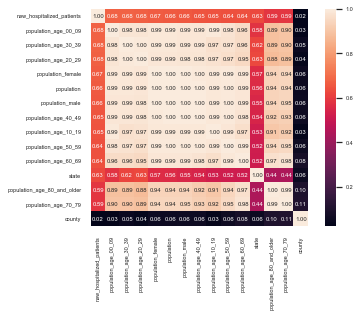

In [88]:
correlation_map = np.corrcoef(data_com[columns].values.T)
sns.set(font_scale=.5)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [91]:
data_com['state'].value_counts()

0    14847
1     1153
Name: state, dtype: int64

I decided not to include county and state into the model since there are only two states and the county column had little correlation. I tried pulling these data on different states but New York and Florida were the only states that had data on new_hospitalized_patients.